# 03_NTU_workshop_Data_preprocessing_notebook-master

## 1. Introduction

Data preprocessing, data wrangling (other term for it is data munging) is the term, which involves processing data ('raw') in order to get transformed set of data ('new'). The process is the one of the most important components in the data science workflow. It typically includes such actions like concatenating, grouping, merging, sorting etc. In some of the cases, where the data set is small or contains not many `messy data` you can use simple spreadsheet like Excel, LibreOffice Calc, Google Sheets or others (https://en.wikipedia.org/wiki/List_of_spreadsheet_software).  
However, it is very important to closely look into the data, as the problem may persist and result in falsly predictions.  
The process itself is one of the most time consuming stage of the machine learning.

In this notebook we will be using `pandas` (and occasionally `numpy`) as our core package for data wrangling.  
We will also use the new data set, which wasn't covered on the previous workshops, so please try to download the data set first.

## 2. Data set  


The data set is the result of different experiments with roll compactor and oscillate milling at various process settings. The part of the data was published in Kazemi et al. (Powder Technology, 301,2016, 1252-1258, https://www.sciencedirect.com/science/article/pii/S0032591016304387). The overview of the process pipline is presented below.

![process](./img/process.png "The overview of the dry granulation process.")

 The data set consisted of information about composition of the powders (first eight parameters), compaction force (kN/cm), roll gap (mm), screw speed (rpm), type of roll surface, impeller tip speed (rpm), screen size (mm), and size class (d10, d50 and d90). The values 1, 2 and 3 were assign to size class d10, d50 and d90 respectively. The output of models were d10, d50 and d90 granule sizes.

## 3. Data preprocessing

Let's start by importing our tools.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GroupKFold # import KFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

Loading and briefly look at the data.

In [58]:
myData = pd.read_csv('case_study1.txt', sep='\t')

In [59]:
myData

,MCC_101,Mannitol,Mcc-Vivapur_102,Mcc-Vivapur_302,Powder_cellulose-_Arbocel_P290,Lactose-_Granulac_200,Magnesium_carbonate-_Magnesia_18,Lactose_450M,Compaction_Force_(kN/cm),Roll_gap_(mm),Width_(mm),Roll_diameter_(mm),Roll_speed_(rpm),Roll_surface,Impeller_speed_[rpm],Screen_size_[mm],Size_class,Granules_size
0,100,0,0,0,0,0,0,0,7.46,2.3,25,120,3,1,75,1.5,1,282.400000
1,100,0,0,0,0,0,0,0,7.46,2.3,25,120,3,1,150,1.5,1,291.100000
2,100,0,0,0,0,0,0,0,7.46,2.3,25,120,3,1,300,1.5,1,244.600000
3,100,0,0,0,0,0,0,0,6.30,2.5,25,120,3,1,75,1.0,1,94.200000
4,100,0,0,0,0,0,0,0,6.30,2.5,25,120,3,1,150,1.0,1,74.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,0,100,0,0,0,0,0,0,8.00,1.5,25,250,2,2,30,1.0,2,731.200000
848,0,100,0,0,0,0,0,0,8.00,1.5,25,250,2,2,30,1.0,3,1020.200000
849,0,100,0,0,0,0,0,0,8.00,1.5,25,250,2,2,120,1.0,1,145.466667
850,0,100,0,0,0,0,0,0,8.00,1.5,25,250,2,2,120,1.0,2,883.933333


In [60]:
myData.dtypes

MCC_101                               int64
Mannitol                              int64
Mcc-Vivapur_102                       int64
Mcc-Vivapur_302                       int64
Powder_cellulose-_Arbocel_P290        int64
Lactose-_Granulac_200                 int64
Magnesium_carbonate-_Magnesia_18      int64
Lactose_450M                          int64
Compaction_Force_(kN/cm)            float64
Roll_gap_(mm)                       float64
Width_(mm)                            int64
Roll_diameter_(mm)                    int64
Roll_speed_(rpm)                      int64
Roll_surface                          int64
Impeller_speed_[rpm]                  int64
Screen_size_[mm]                    float64
Size_class                            int64
Granules_size                       float64
dtype: object

### Linear regression without preprocessing the data

Let's try to fit a linear regression model on the data set which has not been preprocessed. We will randomly split our data leaving 70% to be a train data set and 30% test data set.

In [92]:
ncols = myData.shape[1]
nrows = myData.shape[0]

X_noPP = myData.drop(myData.columns[ncols-1], axis=1)
y_noPP = myData[myData.columns[ncols-1]]

X_noPP_train, X_noPP_test, y_noPP_train, y_noPP_test = train_test_split(X_noPP, y_noPP, test_size=0.3, random_state=123)

and now let's try to fit the regression curve

In [93]:
regressor1 = LinearRegression()  
regressor1.fit(X_noPP_train, y_noPP_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
#To retrieve the intercept:
print(regressor1.intercept_)

#For retrieving the slope:
print(regressor1.coef_)

306.74186211660674
[ 1.05795824e+00  1.51442228e+00 -2.71089540e-01 -1.87593299e-01
 -1.54162455e+00 -7.99279913e-01 -7.46883084e-01  9.74089859e-01
  2.39594572e+01 -2.58572715e+01 -6.92825760e+00 -3.56267838e+00
 -1.28983670e+01  8.05948549e-03 -3.42883331e-01  1.22892864e+02
  5.27608699e+02]


In [95]:
y_noPP_pred = regressor1.predict(X_noPP_test)

In [96]:
df1 = pd.DataFrame({'Actual': y_noPP_test, 'Predicted': y_noPP_pred})
df1

,Actual,Predicted
328,882.200000,859.641447
774,353.266667,390.508838
78,1156.100000,1422.505465
740,885.700000,956.751114
768,47.266667,-185.018776
...,...,...
741,915.500000,1036.961349
327,909.400000,1003.398191
227,1064.972793,908.572695
556,44.700000,20.181210


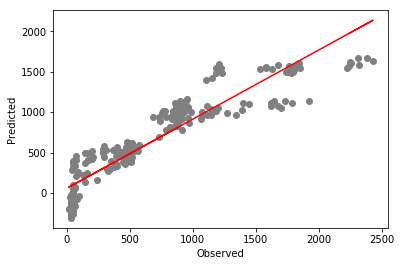

In [97]:
z = np.polyfit(y_noPP_test, y_noPP_pred, 1)
p = np.poly1d(z)

plt.scatter(y_noPP_test, y_noPP_pred,  color='gray')
plt.plot(y_noPP_test,p(y_noPP_test),color='red')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

In [98]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_noPP_test, y_noPP_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_noPP_test, y_noPP_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_noPP_test, y_noPP_pred)))

Mean Absolute Error: 181.8806677349748
Mean Squared Error: 57175.64836056324
Root Mean Squared Error: 239.11429978268393


### Introducing grouping index

Let's select the columns by which will be doing grouping. In other words we will be grouping our data by the experiments which were performed.

In [68]:
groupingIndex = list(myData.iloc[:,0:16].columns)
groupingIndex

['MCC_101',
 'Mannitol',
 'Mcc-Vivapur_102',
 'Mcc-Vivapur_302',
 'Powder_cellulose-_Arbocel_P290',
 'Lactose-_Granulac_200',
 'Magnesium_carbonate-_Magnesia_18',
 'Lactose_450M',
 'Compaction_Force_(kN/cm)',
 'Roll_gap_(mm)',
 'Width_(mm)',
 'Roll_diameter_(mm)',
 'Roll_speed_(rpm)',
 'Roll_surface',
 'Impeller_speed_[rpm]',
 'Screen_size_[mm]']

In [69]:
groupedMyData = myData.groupby(by=groupingIndex,as_index=False)

In [70]:
groupedMyData.dtypes.head(10)

MCC_101  \
MCC_101 Mannitol Mcc-Vivapur_102 Mcc-Vivapur_302 Powder_cellulose-_Arbocel_P290 Lactose-_Granulac_200 Magnesium_carbonate-_Magnesia_18 Lactose_450M Compaction_Force_(kN/cm) Roll_gap_(mm) Width_(mm) Roll_diameter_(mm) Roll_speed_(rpm) Roll_surface Impeller_speed_[rpm] Screen_size_[mm]           
0       0        0               0               0                              0                     0                                100          3.320                    2.8           25         120                3                1            75                   1.0                int64   
                                                                                                                                                                                                                                                                            1.5                int64   
                                                                                                                                                                                                                                                                            2.0                int64   
                                                                                                                                                                                                                                                       150                  1.0                int64   
                                                                                                                                                                                                                                                                            1.5                int64   
                                                                                                                                                                                                                                                                            2.0                int64   
                                                                                                                                                                                                                                                       300                  1.0                int64   
                                                                                                                                                                                                                                                                            1.5                int64   
                                                                                                                                                                                                                                                                            2.0                int64   
                                                                                                                                                    4.482                    2.8           25         120                3                1            75                   1.0                int64   

                                                                                                                                                                                                                                                                                             Mannitol  \
MCC_101 Mannitol Mcc-Vivapur_102 Mcc-Vivapur_302 Powder_cellulose-_Arbocel_P290 Lactose-_Granulac_200 Magnesium_carbonate-_Magnesia_18 Lactose_450M Compaction_Force_(kN/cm) Roll_gap_(mm) Width_(mm) Roll_diameter_(mm) Roll_speed_(rpm) Roll_surface Impeller_speed_[rpm] Screen_size_[mm]            
0       0        0               0               0                              0                     0                                100

In [71]:
aggMyData = groupedMyData.aggregate(list)

In [72]:
aggMyData['Form'] = aggMyData.Size_class.index

In [73]:
aggMyData

,MCC_101,Mannitol,Mcc-Vivapur_102,Mcc-Vivapur_302,Powder_cellulose-_Arbocel_P290,Lactose-_Granulac_200,Magnesium_carbonate-_Magnesia_18,Lactose_450M,Compaction_Force_(kN/cm),Roll_gap_(mm),Width_(mm),Roll_diameter_(mm),Roll_speed_(rpm),Roll_surface,Impeller_speed_[rpm],Screen_size_[mm],Size_class,Granules_size,Form
0,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,1.0,"[1, 2, 3]","[49.2275773033, 748.6632974257001, 1168.968610...",0
1,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,1.5,"[1, 2, 3]","[125.01862477, 1267.5589366, 1755.22242084]",1
2,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,2.0,"[1, 2, 3]","[561.4231004, 1701.9298986667002, 2242.5888165...",2
3,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,150,1.0,"[1, 2, 3]","[47.762416256, 744.655972388, 1144.3931947527]",3
4,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,150,1.5,"[1, 2, 3]","[219.87786678450001, 1227.008312215, 1779.4473...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,100,0,0,0,0,0,0,0,8.00,3.0,50,250,4,2,154,1.0,"[1, 2, 3]","[49.4, 460.9, 876.1]",280
281,100,0,0,0,0,0,0,0,10.00,1.5,50,250,2,2,154,1.0,"[1, 2, 3]","[53.5, 502.3, 909.4]",281
282,100,0,0,0,0,0,0,0,10.00,1.5,50,250,4,2,154,1.0,"[1, 2, 3]","[55.1, 519.1, 916.3]",282
283,100,0,0,0,0,0,0,0,10.00,3.0,50,250,2,2,154,1.0,"[1, 2, 3]","[50.9, 474.3, 882.6]",283


In [74]:
# The code for unnesting function was taken from StacOverflow
# https://stackoverflow.com/questions/53218931/how-to-unnest-explode-a-column-in-a-pandas-dataframe

def unnesting(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx

    return df1.join(df.drop(explode, 1), how='left')

In [75]:
myCleanData = pd.DataFrame(unnesting(aggMyData,['Size_class','Granules_size']))

Reorder the columns:
 1) get column list  
 2) move selected column to the first column (insert in index = 0)  
 3) use loc to reorder the columns and overwrite the data  

In [76]:
colsList = list(aggMyData)

colsList.insert(0, colsList.pop(colsList.index('Form')))
colsList

['Form',
 'MCC_101',
 'Mannitol',
 'Mcc-Vivapur_102',
 'Mcc-Vivapur_302',
 'Powder_cellulose-_Arbocel_P290',
 'Lactose-_Granulac_200',
 'Magnesium_carbonate-_Magnesia_18',
 'Lactose_450M',
 'Compaction_Force_(kN/cm)',
 'Roll_gap_(mm)',
 'Width_(mm)',
 'Roll_diameter_(mm)',
 'Roll_speed_(rpm)',
 'Roll_surface',
 'Impeller_speed_[rpm]',
 'Screen_size_[mm]',
 'Size_class',
 'Granules_size']

In [77]:
myCleanData = myCleanData.loc[:, colsList]

In [78]:
myCleanData

,Form,MCC_101,Mannitol,Mcc-Vivapur_102,Mcc-Vivapur_302,Powder_cellulose-_Arbocel_P290,Lactose-_Granulac_200,Magnesium_carbonate-_Magnesia_18,Lactose_450M,Compaction_Force_(kN/cm),Roll_gap_(mm),Width_(mm),Roll_diameter_(mm),Roll_speed_(rpm),Roll_surface,Impeller_speed_[rpm],Screen_size_[mm],Size_class,Granules_size
0,0,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,1.0,1,49.227577
0,0,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,1.0,2,748.663297
0,0,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,1.0,3,1168.968611
1,1,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,1.5,1,125.018625
1,1,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,1.5,2,1267.558937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,100,0,0,0,0,0,0,0,10.00,3.0,50,250,2,2,154,1.0,2,474.300000
283,283,100,0,0,0,0,0,0,0,10.00,3.0,50,250,2,2,154,1.0,3,882.600000
284,284,100,0,0,0,0,0,0,0,10.00,3.0,50,250,4,2,154,1.0,1,53.000000
284,284,100,0,0,0,0,0,0,0,10.00,3.0,50,250,4,2,154,1.0,2,559.200000


Ok, this is the almost over of our data wrangling example. Hovever, at the let's check if there are any duplicated experiments. We don't want to make our models confused that for the same inputs there are many various outputs. We should avoid it. All in all, we can tak an average of the output.

In [79]:
newGroupingIndex = groupingIndex + ['Size_class']
myCleanDataDuplicates = myCleanData[myCleanData.duplicated(subset=newGroupingIndex, keep=False)]

In [80]:
myCleanDataDuplicates

,Form,MCC_101,Mannitol,Mcc-Vivapur_102,Mcc-Vivapur_302,Powder_cellulose-_Arbocel_P290,Lactose-_Granulac_200,Magnesium_carbonate-_Magnesia_18,Lactose_450M,Compaction_Force_(kN/cm),Roll_gap_(mm),Width_(mm),Roll_diameter_(mm),Roll_speed_(rpm),Roll_surface,Impeller_speed_[rpm],Screen_size_[mm],Size_class,Granules_size
86,86,0,100,0,0,0,0,0,0,6.0,2.25,50,250,3,2,154,1.0,1,64.5
86,86,0,100,0,0,0,0,0,0,6.0,2.25,50,250,3,2,154,1.0,1,75.4
86,86,0,100,0,0,0,0,0,0,6.0,2.25,50,250,3,2,154,1.0,1,62.7
86,86,0,100,0,0,0,0,0,0,6.0,2.25,50,250,3,2,154,1.0,2,506.0
86,86,0,100,0,0,0,0,0,0,6.0,2.25,50,250,3,2,154,1.0,2,525.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,267,100,0,0,0,0,0,0,0,6.3,2.50,25,120,3,1,150,1.5,2,1197.3
267,267,100,0,0,0,0,0,0,0,6.3,2.50,25,120,3,1,150,1.5,2,1247.4
267,267,100,0,0,0,0,0,0,0,6.3,2.50,25,120,3,1,150,1.5,3,1794.3
267,267,100,0,0,0,0,0,0,0,6.3,2.50,25,120,3,1,150,1.5,3,1813.1


I told you ... It seems that 30 formulations were done in triplicates and this 'raw' data was inserted in our data set.  

We will extract the data without duplicates. The paramter `keep = 'first'` will preserve the first occurence of the duplicated rows.

In [81]:
myCleanDataWODuplicates = myCleanData[-myCleanData.duplicated(subset=newGroupingIndex, keep='first')]

In [82]:
myCleanDataWODuplicates

,Form,MCC_101,Mannitol,Mcc-Vivapur_102,Mcc-Vivapur_302,Powder_cellulose-_Arbocel_P290,Lactose-_Granulac_200,Magnesium_carbonate-_Magnesia_18,Lactose_450M,Compaction_Force_(kN/cm),Roll_gap_(mm),Width_(mm),Roll_diameter_(mm),Roll_speed_(rpm),Roll_surface,Impeller_speed_[rpm],Screen_size_[mm],Size_class,Granules_size
0,0,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,1.0,1,49.227577
0,0,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,1.0,2,748.663297
0,0,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,1.0,3,1168.968611
1,1,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,1.5,1,125.018625
1,1,0,0,0,0,0,0,0,100,3.32,2.8,25,120,3,1,75,1.5,2,1267.558937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,100,0,0,0,0,0,0,0,10.00,3.0,50,250,2,2,154,1.0,2,474.300000
283,283,100,0,0,0,0,0,0,0,10.00,3.0,50,250,2,2,154,1.0,3,882.600000
284,284,100,0,0,0,0,0,0,0,10.00,3.0,50,250,4,2,154,1.0,1,53.000000
284,284,100,0,0,0,0,0,0,0,10.00,3.0,50,250,4,2,154,1.0,2,559.200000


And finally write down the pre-processed files.

In [83]:
myCleanData.to_csv('myCleanData.csv')
myCleanDataDuplicates.to_csv('myCleanDataDuplicates.csv')
myCleanDataWODuplicates.to_csv('myCleanDataWODuplicates.csv')

### Linear regression with pre processed data

Ok, now let's try to fit a linear regression model, like at the beginning of the case. But this time we will be spitting based on the formulations, so we need to take into account grouped rows (indexing by `Form` column).

As in the previous linear regression fit our independent variables are the formulation characteristics and assay conditions while `Granule_size` is the dependent variable (its values are to be predicted). In our data set, we have 19 columns. 1st column is the formulation index, next we have 17 columns of input variables and the last column is the output. Our input columns will be stored in the X variable, and the `Granule_size` column will be stored in y variable. 1st column will be used as a grouping variable.

In [99]:
index_column = 1 # please provide which column has formulation index

ncols = myCleanDataWODuplicates.shape[1]-1
nrows = myCleanDataWODuplicates.shape[0]

X_PP = myCleanDataWODuplicates.drop(myCleanDataWODuplicates.columns[[0,ncols]], axis=1)
y_PP = myCleanDataWODuplicates[myCleanDataWODuplicates.columns[ncols]]

# needed to make cv by groups - first column contains indicies!
groups = myCleanDataWODuplicates[myCleanDataWODuplicates.columns[[index_column - 1]]]

Next, we split 70% of the data to the training set while 30% of the data to test set using below code.

In [100]:
# split on train - test dataset by group 'Formulation no' - this is for Feature Selection
trainPP_inds, testPP_inds = next(GroupShuffleSplit(n_splits=1, train_size=0.7, test_size=0.3).split(X_PP, groups=groups))
X_trainPP, X_testPP, y_trainPP, y_testPP = X_PP.iloc[trainPP_inds], X_PP.iloc[testPP_inds], y_PP.iloc[trainPP_inds], y_PP.iloc[testPP_inds]

After splitting the data into training and testing sets, finally, it is the time to fit our reggresion curve. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [101]:
regressor = LinearRegression()  
regressor.fit(X_trainPP, y_trainPP) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. Because we have multiple independent variables, we will perform `multiple linear regression`.

In [102]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

3.1969972599846188e+16
[-3.19723659e+14 -3.19723659e+14 -3.19412527e+14 -3.19412527e+14
 -3.19412527e+14 -3.19412527e+14 -3.19412527e+14 -3.19723659e+14
  2.01191030e+01 -2.93074195e+01 -6.47381637e+00 -2.39332871e+11
 -1.21468252e+01  3.11132732e+13 -9.68501156e-01  1.92536351e+02
  5.32785672e+02]


Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the `Granule_size`.

In [103]:
y_predPP = regressor.predict(X_testPP)

Now compare the actual output values for X_test with the predicted values, execute the following script:

In [104]:
df2 = pd.DataFrame({'Actual': y_testPP, 'Predicted': y_predPP})
df2

,Actual,Predicted
3,47.762416,396.0
3,744.655972,928.0
3,1144.393195,1464.0
13,298.654054,516.0
13,1252.752000,1048.0
...,...,...
280,460.900000,320.0
280,876.100000,856.0
282,55.100000,-128.0
282,519.100000,404.0


We can also visualize comparison result. Though our model is not very precise, the predicted `Granule_size` are close to the actual ones.

Let's add points and trend line to our plot:

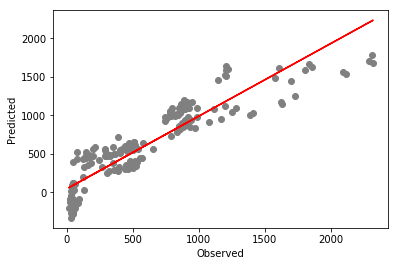

In [105]:
z = np.polyfit(y_testPP, y_predPP, 1)
p = np.poly1d(z)

plt.scatter(y_testPP, y_predPP,  color='gray')
plt.plot(y_testPP,p(y_testPP),color='red')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

Let’s find the values some metrics such as MAE, MSE, and RMSE using our test data.

In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testPP, y_predPP))  
print('Mean Squared Error:', metrics.mean_squared_error(y_testPP, y_predPP))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testPP, y_predPP)))

Mean Absolute Error: 176.45527362332223
Mean Squared Error: 46365.24175334047
Root Mean Squared Error: 215.32589661566598


These metrics are unbiased by losing the formulation index.

That's it! Now we can apply our fancy `scaling`, `noising` code in order to get the data for model development. 

## Thank you!
If you have questions, suggestions, please reach me at: j.szlek@uj.edu.pl